In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#นำเข้าข้อมูล
data = pd.read_csv('sanitary.csv')

In [3]:
data

,brand,price,sale,total_sale,location,usage,length,type,wing,size,performance
0,Sofy,10.75,74.0,795.5,Bangkok,night,29.0,pad,no,thick,1
1,Sofy,33.00,3269.0,107877.0,Bangkok,day,22.0,pad,yes,thin,1
2,Sofy,11.00,748.0,8228.0,Bangkok,night,29.0,pad,no,thick,1
3,Sofy,59.00,819.0,48321.0,Bangkok,night,29.0,pad,yes,thin,1
4,Sofy,39.00,426.0,16614.0,Bangkok,normal,22.0,pad,no,thin,1
...,...,...,...,...,...,...,...,...,...,...,...
5774,Sanita,109.00,180.0,19620.0,กรุงเทพมหานคร,night,29.0,pad,yes,thick,1
5775,Sanita,960.00,129.0,123840.0,กรุงเทพมหานคร,night,29.0,pad,yes,thick,1
5776,Sanita,129.00,91.0,11739.0,กรุงเทพมหานคร,normal,24.5,pad,yes,thick,1
5777,Sanita,119.00,62.0,7378.0,กรุงเทพมหานคร,normal,24.5,pad,yes,thin,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5779 entries, 0 to 5778
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        5779 non-null   object 
 1   price        5779 non-null   float64
 2   sale         5634 non-null   float64
 3   total_sale   5779 non-null   float64
 4   location     5779 non-null   object 
 5   usage        5779 non-null   object 
 6   length       5498 non-null   float64
 7   type         5779 non-null   object 
 8   wing         5779 non-null   object 
 9   size         5532 non-null   object 
 10  performance  5779 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 496.8+ KB


In [5]:
# drop column ที่ไม่ใช้ออก
data = data.drop(columns=['location'])

In [6]:
data

,brand,price,sale,total_sale,usage,length,type,wing,size,performance
0,Sofy,10.75,74.0,795.5,night,29.0,pad,no,thick,1
1,Sofy,33.00,3269.0,107877.0,day,22.0,pad,yes,thin,1
2,Sofy,11.00,748.0,8228.0,night,29.0,pad,no,thick,1
3,Sofy,59.00,819.0,48321.0,night,29.0,pad,yes,thin,1
4,Sofy,39.00,426.0,16614.0,normal,22.0,pad,no,thin,1
...,...,...,...,...,...,...,...,...,...,...
5774,Sanita,109.00,180.0,19620.0,night,29.0,pad,yes,thick,1
5775,Sanita,960.00,129.0,123840.0,night,29.0,pad,yes,thick,1
5776,Sanita,129.00,91.0,11739.0,normal,24.5,pad,yes,thick,1
5777,Sanita,119.00,62.0,7378.0,normal,24.5,pad,yes,thin,1


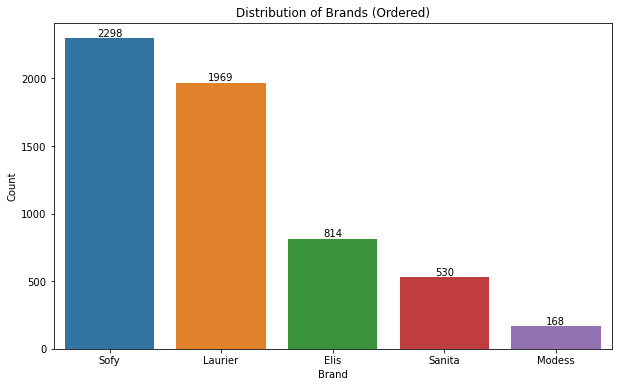

In [7]:
# สร้าง Bar Chart สำหรับ brand
plt.figure(figsize=(10, 6))

sorted_brands = data['brand'].value_counts().index
sns.countplot(x='brand', data=data, order=sorted_brands)

for index, value in enumerate(data['brand'].value_counts()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

plt.title('Distribution of Brands (Ordered)')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()


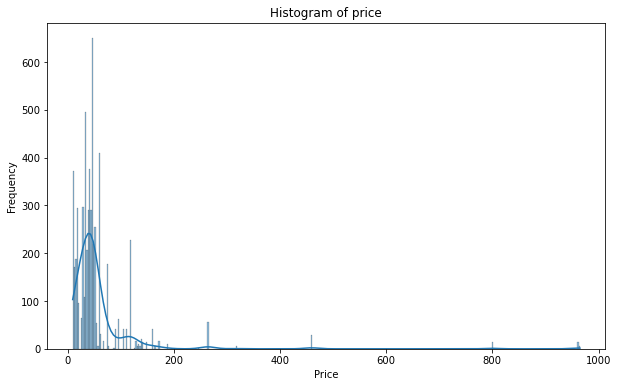

In [8]:
# พล็อต Histogram ของคอลัมน์ 'price'
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Histogram of price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

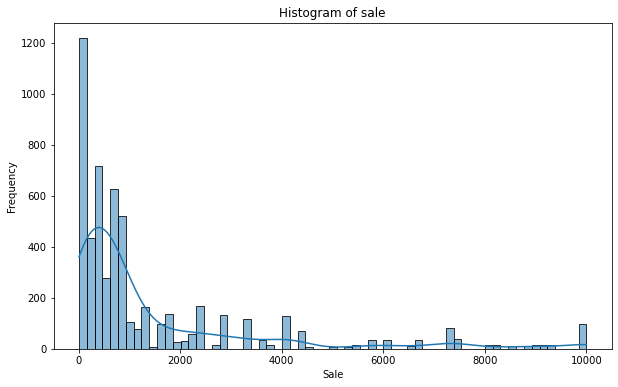

In [9]:
# พล็อต Histogram ของคอลัมน์ 'sale'
plt.figure(figsize=(10, 6))
sns.histplot(data['sale'], kde=True)
plt.title('Histogram of sale')
plt.xlabel('Sale')
plt.ylabel('Frequency')
plt.show()

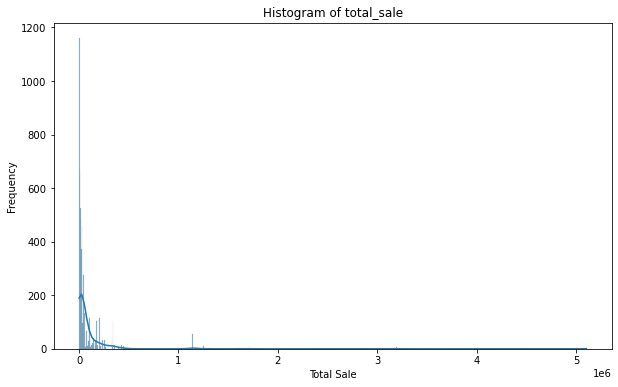

In [10]:
# พล็อต Histogram ของคอลัมน์ 'total_sale'
plt.figure(figsize=(10, 6))
sns.histplot(data['total_sale'], kde=True)
plt.title('Histogram of total_sale')
plt.xlabel('Total Sale')
plt.ylabel('Frequency')
plt.show()

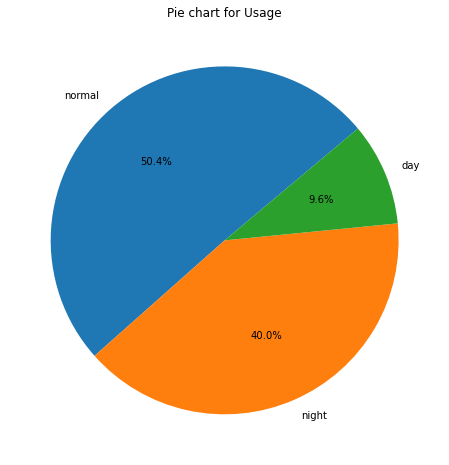

In [11]:
# สร้าง Pie chart สำหรับ 'usage'
usage_counts = data['usage'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(usage_counts, labels=usage_counts.index, autopct='%1.1f%%', startangle=40)
plt.title('Pie chart for Usage')
plt.show()

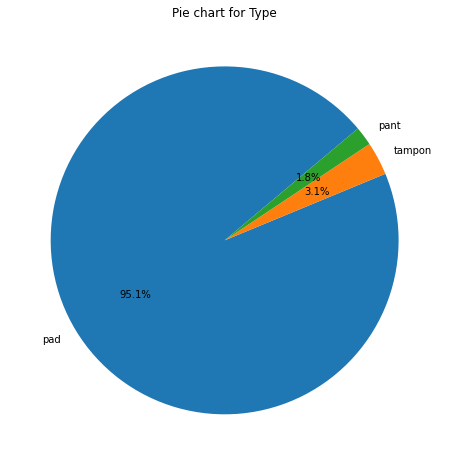

In [12]:
# สร้าง Pie chart สำหรับ 'type'
usage_counts = data['type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(usage_counts, labels=usage_counts.index, autopct='%1.1f%%', startangle=40)
plt.title('Pie chart for Type')
plt.show()

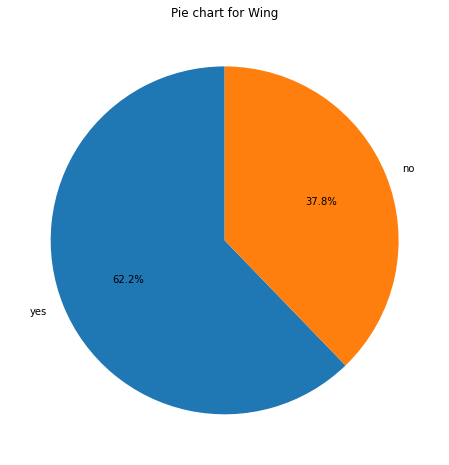

In [13]:
# สร้าง Pie chart สำหรับ 'wing'
wing_counts = data['wing'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(wing_counts, labels=wing_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie chart for Wing')
plt.show()

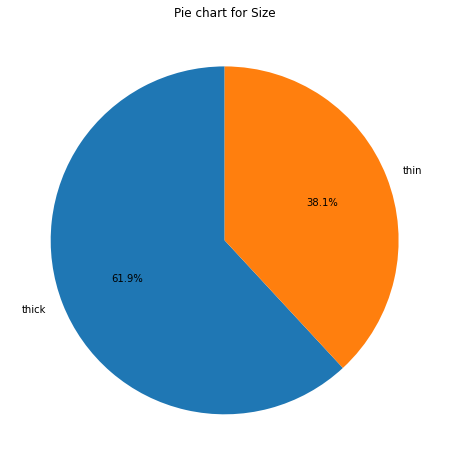

In [14]:
# สร้าง Pie chart สำหรับ 'size'
wing_counts = data['size'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(wing_counts, labels=wing_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie chart for Size')
plt.show()

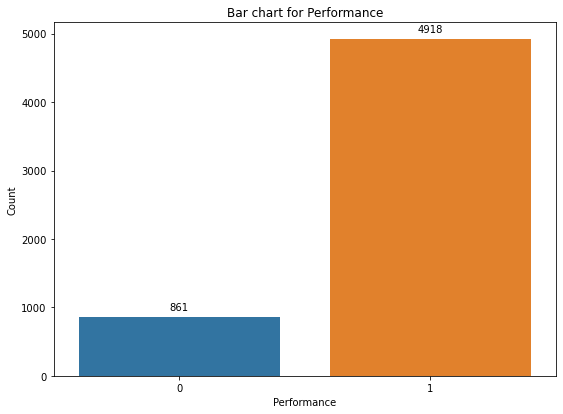

In [15]:
# สร้าง Bar chart สำหรับ 'performance'
plt.figure(figsize=(9, 6.5))
ax = sns.countplot(x='performance', data=data)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Bar chart for Performance')
plt.xlabel('Performance')
plt.ylabel('Count')
plt.show()


In [16]:
#เตรียมข้อมูลและแบ่งชุดข้อมูล
x = data.drop(['total_sale','performance','sale'], axis=1)
y = data['total_sale']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
#แปลงชนิดข้อมูล
categorical_features = ["brand","wing","type","size","usage"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[  0.  ,   0.  ,   0.  , ...,   0.  ,  10.75,  29.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,  33.  ,  22.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,  11.  ,  29.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   1.  , 129.  ,  24.5 ],
       [  0.  ,   0.  ,   0.  , ...,   1.  , 119.  ,  24.5 ],
       [  0.  ,   0.  ,   0.  , ...,   1.  , 129.  ,  24.5 ]])

In [18]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,10.75,29.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,33.00,22.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,11.00,29.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,59.00,29.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,39.00,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5774,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,109.00,29.0
5775,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,960.00,29.0
5776,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,129.00,24.5
5777,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,119.00,24.5


In [19]:
#แก้ไข missing values
imputer = SimpleImputer(strategy='mean')  
data = imputer.fit_transform(transformed_x)

In [20]:
data

array([[  0.  ,   0.  ,   0.  , ...,   0.  ,  10.75,  29.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,  33.  ,  22.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,  11.  ,  29.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   1.  , 129.  ,  24.5 ],
       [  0.  ,   0.  ,   0.  , ...,   1.  , 119.  ,  24.5 ],
       [  0.  ,   0.  ,   0.  , ...,   1.  , 129.  ,  24.5 ]])

In [21]:
print(transformed_x.dtype)

float64


In [22]:
# สร้างข้อมูลสำหรับทดสอบ
x, y = make_classification(n_samples=1000, n_features=18, n_classes=2, random_state=42)

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
# สร้างและฝึกโมเดล (Random Forest Classifier)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# ทำนายความน่าจะเป็นในคลาส positive สำหรับทุกรุ่น
rf_predictions = rf_model.predict(x_test)

# ประเมินโมเดลแต่ละตัว
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

Random Forest Accuracy: 0.88


In [25]:
# สร้างและฝึกโมเดล (CatBoost Classifier)
catboost_model = CatBoostClassifier(iterations=100, random_state=42, verbose=0)
catboost_model.fit(x_train, y_train)

In [26]:
# ทำนายความน่าจะเป็นในคลาส positive สำหรับทุกรุ่น
catboost_predictions = catboost_model.predict(x_test)

# ประเมินโมเดลแต่ละตัว
catboost_accuracy = accuracy_score(y_test, catboost_predictions)

print(f'CatBoost Accuracy: {catboost_accuracy:.2f}')

CatBoost Accuracy: 0.88


In [27]:
# สร้างและฝึกโมเดล (LightGBM Classifier)
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)
lgbm_model.fit(x_train, y_train)

LGBMClassifier(random_state=42, verbose=-1)

In [28]:
# ทำนายความน่าจะเป็นในคลาส positive สำหรับทุกรุ่น
lgbm_predictions = lgbm_model.predict(x_test)

# ประเมินโมเดลแต่ละตัว
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)

print(f'LightGBM Accuracy: {lgbm_accuracy:.2f}')

LightGBM Accuracy: 0.89


In [29]:
# สร้างและฝึกโมเดล (XGBoost Classifier)
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [30]:
# ทำนายความน่าจะเป็นในคลาส positive สำหรับทุกรุ่น
xgb_predictions = xgb_model.predict(x_test)

# ประเมินโมเดลแต่ละตัว
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

print(f'XGBoost Accuracy: {xgb_accuracy:.2f}')

XGBoost Accuracy: 0.90


In [31]:
# สร้าง VotingClassifier จากแบบจำลองทั้งหมด
voting_clf = VotingClassifier(estimators=[
    ('random_forest', rf_model),
    ('catboost', catboost_model),
    ('lgbm', lgbm_model),
    ('xgb', xgb_model)
], voting='soft' , flatten_transform=True)  

In [32]:
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x000002ECB0C677C0>),
                             ('lgbm',
                              LGBMClassifier(random_state=42, verbose=-1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, devic...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [33]:
for estimator in voting_clf.estimators_:
    if hasattr(estimator, 'feature_importances_'):
        print(estimator.feature_importances_)

[0.01778951 0.01744681 0.01683751 0.02354067 0.08823942 0.01619935
 0.0195723  0.22618938 0.02262984 0.01826415 0.0219059  0.01673862
 0.01744973 0.01508003 0.01944833 0.01625166 0.08278113 0.34363564]
[ 1.22051131  1.67191086  1.07436212  1.93460607 23.90722739  1.07814351
  1.44964661  6.27441844  2.1171775   0.91446087  2.02826262  0.9810633
  1.54078527  1.95505062  1.54791925  1.32577855  3.93392171 45.044754  ]
[ 89 116 133 143 488 127  93 203 187 122 161 108 155 109 101 100 142 403]
[0.01996527 0.02324553 0.02122626 0.0160764  0.09617937 0.01871065
 0.03642777 0.1261019  0.02573834 0.01511919 0.03150647 0.02746757
 0.02852136 0.01491549 0.0172659  0.01607891 0.03287152 0.4325821 ]


In [34]:
# ใช้ VotingClassifier ในการทำนายข้อมูลทดสอบ 
predictions = voting_clf.predict(x_test)

In [35]:
# ประเมินประสิทธิภาพของโมเดลบนข้อมูลทดสอบ
accuracy = accuracy_score(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       102
           1       0.94      0.82      0.87        98

    accuracy                           0.89       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.89      0.88       200



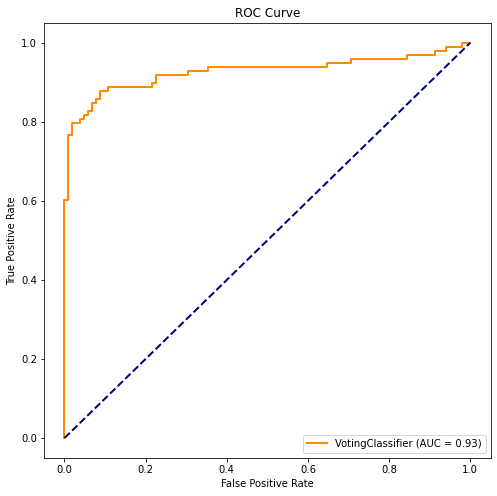

In [36]:
# ทำนายความน่าจะเป็นในคลาส positive สำหรับ VotingClassifier
voting_probabilities = voting_clf.predict_proba(x_test)[:, 1]

# คำนวณ ROC curve และ AUC
fpr, tpr, thresholds = roc_curve(y_test, voting_probabilities)
roc_auc = auc(fpr, tpr)

# วาด ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'VotingClassifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [37]:
voting_clf

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x000002ECB0C677C0>),
                             ('lgbm',
                              LGBMClassifier(random_state=42, verbose=-1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, devic...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [38]:
voting_clf.predict_proba([[0, 0, 1, 0, 0, 1, 0, 1, 0, 0 ,1, 0, 1, 0, 0, 0, 100, 23]])

array([[0.13710391, 0.86289609]])